# Week 3


## Name         : Ayachit Madhukar  
## Course       : DSC530 
## Instructor  : Mr. Shankar Parajulee 
## Date           : 04 Jan 2020


**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [21]:
# setting uop working directory
import os
os.getcwd() 
import sys
sys.path.append('../ThinkStats2-master/code')

In [22]:
# Import modules 

import nsfg
import thinkstats2
import thinkplot
import first
import numpy as np 

In [23]:
resp = nsfg.ReadFemResp()

resp

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,11018,1,5,2,5,3.0,34,34,811,34,...,0,3247.445399,3784.333145,6565.818007,2,76,1228,1216,15:57:38,82.907333
7639,6075,5,5,3,5,3.0,17,17,1014,17,...,0,2273.211779,2497.234491,4392.385746,2,76,1228,1216,18:23:53,54.044833
7640,5649,1,5,2,5,5.0,29,29,873,29,...,0,3247.445399,3569.313710,6003.228729,2,76,1228,1216,18:42:41,68.168000
7641,501,5,5,3,5,2.0,16,16,1034,16,...,0,5304.160818,5954.644352,10473.623950,2,76,1228,1216,16:02:45,32.717333


In [24]:
# Calculating PMF

pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

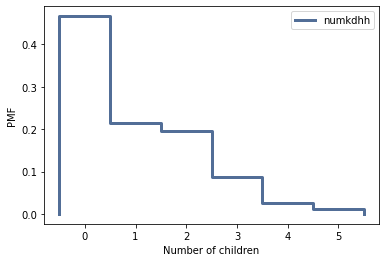

In [25]:
# Preparing Plot

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [26]:
# Function for BiasPmf

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [27]:
# biased pmf

biased = BiasPmf(pmf, label='biased')

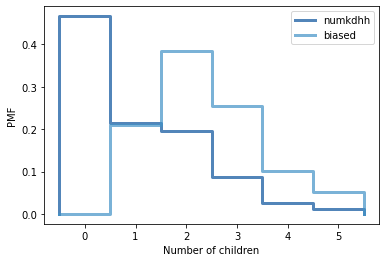

In [28]:
# Comparision plot

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [29]:
# comparing both the means

pmf.Mean() , biased.Mean()

(1.024205155043831, 2.403679100664282)


**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [30]:
# getting required datasets
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.caseid

0            1
1            1
2            2
3            2
4            2
         ...  
13581    12568
13584    12569
13588    12571
13591    12571
13592    12571
Name: caseid, Length: 9148, dtype: int64

In [31]:
# preparing map
preg_map = nsfg.MakePregMap(live)
preg_map

defaultdict(list,
            {1: [0, 1],
             2: [2, 3, 4],
             6: [5, 6, 7],
             7: [8, 9],
             12: [10],
             14: [11, 12],
             15: [15, 16],
             18: [17],
             21: [19, 20],
             23: [21],
             24: [23, 24, 25],
             28: [26],
             31: [27, 28, 29],
             36: [31],
             38: [32, 33, 34],
             39: [35],
             44: [39, 40],
             46: [42, 43],
             49: [44, 47],
             51: [48, 49],
             57: [52, 53, 54],
             60: [55, 56],
             63: [58, 59],
             69: [60],
             70: [62, 64],
             71: [65],
             72: [67],
             73: [68, 69],
             77: [70, 71],
             80: [72, 74, 75, 76],
             81: [77],
             86: [78, 79, 80],
             90: [82],
             91: [83, 87, 88, 89],
             92: [90, 91, 92],
             95: [94],
             101: [95, 9

In [32]:
# Preparing hist and calculating diff

hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

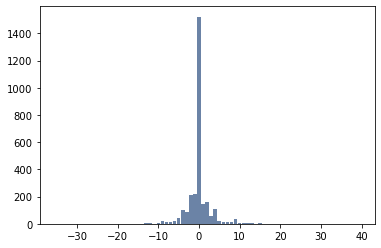

In [33]:
# Plot

thinkplot.Hist(hist)

In [34]:
# Mean

pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125